<a href="https://colab.research.google.com/github/Shamiso-Tirivanhu/Gold-Price-Prediction-Using-Python-Machine-Learning/blob/main/Gold_Price_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the Dependices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Data Collection and processing
from google.colab import files
uploaded = files.upload()

Saving gold_price_data.csv to gold_price_data.csv


In [3]:
# Load the csv file into a pandas dataframe
gold_data = pd.read_csv('gold_price_data.csv')

In [4]:
# Display the first five rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# peint the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
# Getting stastical measures about the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# Conversion of Date column to datatime objects
gold_data['Date']= pd.to_datetime(gold_data['Date'])

In [11]:
# Extract numerical features for correlation analysis
numerical_features = gold_data.select_dtypes(include=[np.number])

In [12]:
# Find the correlationn
# Positive correlation - one value decrease the other one increase
# Negative correlation - one value increase the other value decrease
correlation = gold_data.corr()

<Axes: >

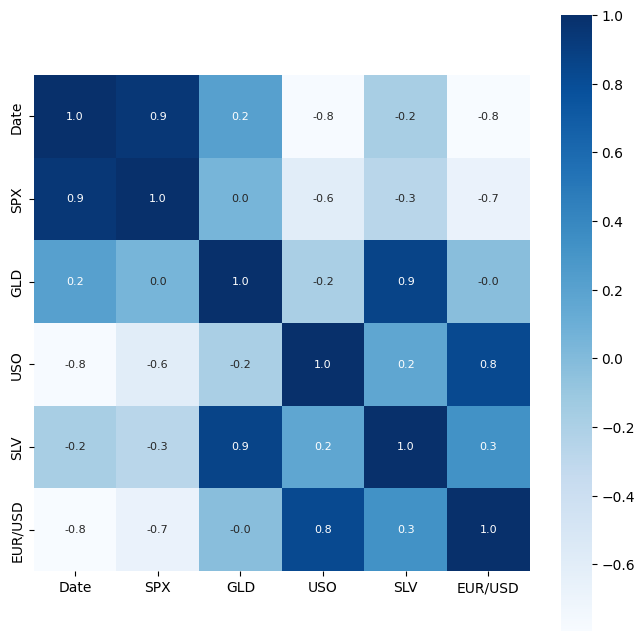

In [13]:
# Constructing heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# Correlation values of GMT
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


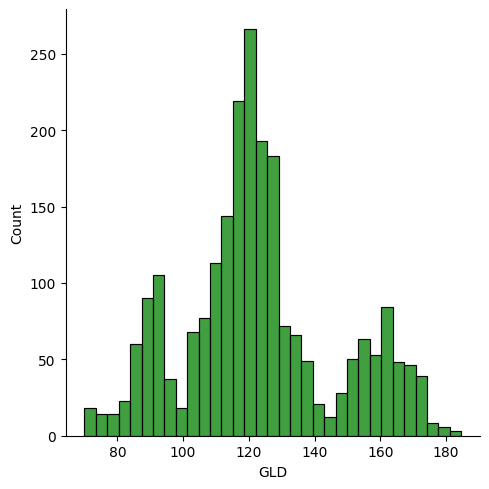

In [15]:
# Distribution of Gold prices
sns.displot(gold_data['GLD'], color='green')


In [16]:
# Split the features and the target
X = gold_data.drop(['Date','GLD'], axis =1)
Y = gold_data['GLD']

In [17]:
# Displaying the features and target
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
# Split into training and test data
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
# Model training Using a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
# Model Evaluation
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# Displaying the test data prediction
print(test_data_prediction)

[168.61639929  81.86009968 116.1287007  127.68350025 120.85330153
 154.66349777 150.47749906 126.03650063 117.583299   125.89600093
 116.92000077 170.62320082 142.04319826 167.82899825 115.15559968
 117.50150086 139.30750329 170.37550112 159.63260304 158.16210011
 155.14059962 125.31780011 175.59569991 156.63090337 125.23580043
  93.85529991  77.22370005 120.73620033 119.07189948 167.36200011
  87.99900079 125.47400021  91.22460043 117.6568004  121.18759962
 136.54840064 115.49970127 115.21100074 147.2259993  107.08300081
 104.17390263  87.25719797 126.5021003  117.93879974 152.56229922
 119.6317     108.29310024 108.20369801  93.22750048 127.00939804
  75.17280015 113.76319933 121.37559969 111.30149925 118.82349909
 120.74389944 158.76770042 168.20020096 147.19279722  85.94779854
  94.43520026  86.90329875  90.57899982 119.06600049 126.3963008
 127.47840005 170.4378004  122.23199951 117.33229903  98.30530032
 168.51560079 143.27349768 132.09620232 121.3152024  120.98449911
 119.626500

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared:', error_score)

R squared: 0.9894939523785328


Text(0, 0.5, 'GLD Price')

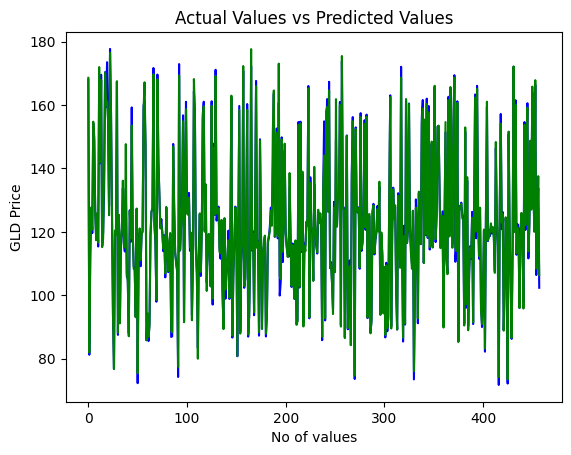

In [23]:
# Compare actual values and predicted values

Y_test = list(Y_test)

# Compare actual values and predicted values
Y_test = list(Y_test)

Plot = pd.DataFrame(data={'Actual Values':Y_test, 'Predicted Values':test_data_prediction})
plt.plot(Plot['Actual Values'], color='blue', label='Actual Values')
plt.plot(Plot['Predicted Values'], color='green', label='Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('No of values')
plt.ylabel('GLD Price')